In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("C:/Users/lovel/Downloads/archive (1)/A_Z Handwritten Data.csv").astype('float32')
data.head(10)

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
X = data.drop('0',axis = 1)
y = data['0']

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

x_train = np.reshape(x_train.values, (x_train.shape[0], 28,28))
x_test = np.reshape(x_test.values, (x_test.shape[0], 28,28))

print("Shape of Training data: ", x_train.shape)
print("Shape of Testing data: ", x_test.shape)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Shape of Training data:  (297960, 28, 28)
Shape of Testing data:  (74490, 28, 28)


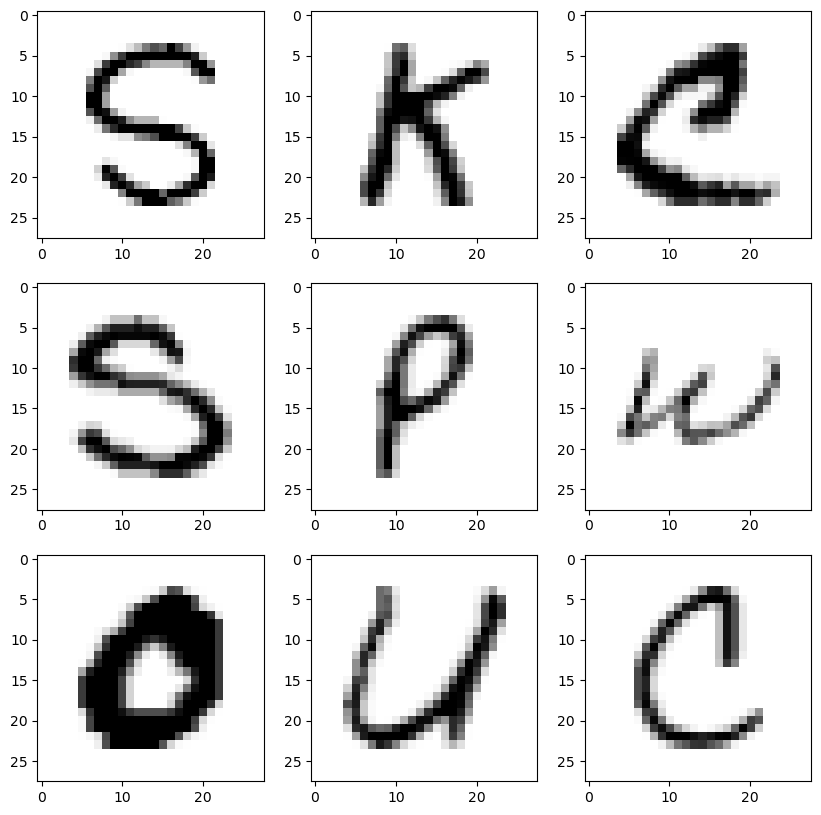

In [5]:
import cv2
shuffle_data = shuffle(x_train)

fig, axes = plt.subplots(3,3, figsize = (10,10))
axes = axes.flatten()

for i in range(9):
    _, shu = cv2.threshold(shuffle_data[i], 30, 200, cv2.THRESH_BINARY)
    axes[i].imshow(np.reshape(shuffle_data[i], (28,28)), cmap="Greys")
plt.show()

In [6]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],x_train.shape[2],1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2],1)

print("New shape of training data: ", x_train.shape)
print("New shape of testing data: ", x_test.shape)

New shape of training data:  (297960, 28, 28, 1)
New shape of testing data:  (74490, 28, 28, 1)


In [7]:
import tensorflow
from tensorflow.keras.utils import to_categorical

y_training = to_categorical(y_train, num_classes = 26, dtype='int')
y_testing = to_categorical(y_test, num_classes = 26, dtype='int')

print("New shape of training labels: ", y_training.shape)
print("New shape of testing labels: ", y_testing.shape)

New shape of training labels:  (297960, 26)
New shape of testing labels:  (74490, 26)


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [9]:
model = Sequential()

model.add(Conv2D(64 , (3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(2, 2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D(2, 2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D(2,2))

model.add(Flatten())

model.add(Dense(128,activation ="relu"))
model.add(Dense(256,activation ="relu"))

model.add(Dense(26,activation ="softmax"))

In [10]:
model.compile(optimizer = Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
history = model.fit(x_train, y_training, epochs=5,  validation_data = (x_test,y_testing))

Epoch 1/5
9312/9312 [==============================] - 256s 27ms/step - loss: 0.2119 - accuracy: 0.9396 - val_loss: 0.1153 - val_accuracy: 0.9673
Epoch 2/5
9312/9312 [==============================] - 231s 25ms/step - loss: 0.1119 - accuracy: 0.9684 - val_loss: 0.1034 - val_accuracy: 0.9709
Epoch 3/5
9312/9312 [==============================] - 248s 27ms/step - loss: 0.0965 - accuracy: 0.9732 - val_loss: 0.1107 - val_accuracy: 0.9699
Epoch 4/5
9312/9312 [==============================] - 261s 28ms/step - loss: 0.0890 - accuracy: 0.9753 - val_loss: 0.1204 - val_accuracy: 0.9686
Epoch 5/5
9312/9312 [==============================] - 721s 77ms/step - loss: 0.0841 - accuracy: 0.9776 - val_loss: 0.0951 - val_accuracy: 0.9758


In [12]:
# Evaluate the model on the test set and print additional metrics
test_loss, test_acc=model.evaluate(x_test, y_testing)
print(f'\nTest accuracy: {test_acc * 100:.2f}%')

2328/2328 [==============================] - 32s 14ms/step - loss: 0.0951 - accuracy: 0.9758

Test accuracy: 97.58%


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 1, 1, 64)          0

In [14]:
model.save(r'handwritten_character_recog_model.h5')

C:\Users\lovel\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


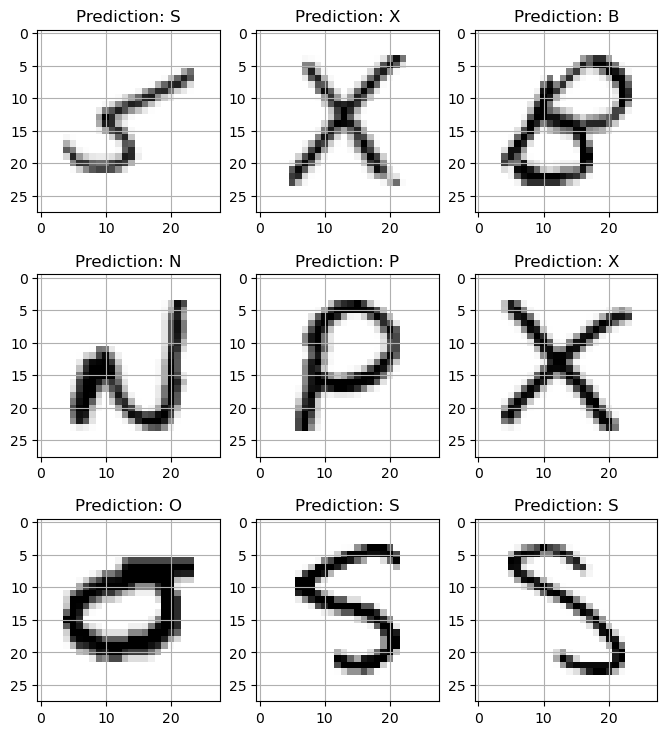

In [15]:
words = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}

fig, axes = plt.subplots(3,3, figsize=(8,9))
axes = axes.flatten()

for i,ax in enumerate(axes):
     image = np.reshape(x_test[i], (28,28))
     ax.imshow(image, cmap="Greys")
    
     pred = words[np.argmax(y_testing[i])]
     ax.set_title("Prediction: "+pred)
     ax.grid()

In [22]:
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
 
from keras.models import load_model
model = load_model('handwritten_character_recog_model.h5')
 
words = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}
 
image = cv2.imread('B.jpg')
image_copy = image.copy()
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (400,440))
 
image_copy = cv2.GaussianBlur(image_copy, (7,7), 0)
gray_image = cv2.cvtColor(image_copy, cv2.COLOR_BGR2GRAY)
_, img_thresh = cv2.threshold(gray_image, 100, 255, cv2.THRESH_BINARY_INV)
 
final_image = cv2.resize(img_thresh, (28,28))
final_image =np.reshape(final_image, (1,28,28,1))
 
prediction = words[np.argmax(model.predict(final_image))]
 
cv2.putText(image, "Prediction: " + prediction, (20,410), cv2.FONT_HERSHEY_DUPLEX, 1.3, color = (0,255,0))
cv2.imshow('handwritten character recognition ', image)
 
while (1):
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
         break
cv2.destroyAllWindows()

1/1 [==============================] - 0s 78ms/step
